# Description of the content

This jupyter notebook produces the figures 2 to 10 of the article "ClimLoco1.0: CLimate variable confidence Interval of Multivariate Linear Observational COnstraint". These figures are only based on **synthetic** data, generated directly in this notebook.

The parameters to generate or change the synthetic data are given in the beginning of this notebook. Feel free to download the repository and change them.

# Packages

In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from functions.display_figures_2_to_10 import *
from functions.create_synthetic_data import generate_synthetic_data_sets
from functions.compute_probability_intervals import *
from functions.compute_confidence_intervals import *


# Parameters for the creation of the synthetic data (user choices)

In [2]:
# X
mu_X_theo    = 0 # Theoretical expectation of X
sigma_X_theo = 1 # Theoretical standard deviation of X

# X noisy (observational noise N)
sigma_N      = 1*sigma_X_theo # Theoretical standard deviation of N

# The observation of X
X_obs = np.array(2.2)

# Y
mu_Y_theo    = 0 # Theoretical expectation of Y
sigma_Y_theo = 1 # Theoretical standard deviation of Y

# Relation between X and Y
corr_theo = 0.85 # Theoretical correlation

In [3]:
# Confidence of the confidence interval
confidence_level = 0.90 # 90 % confidence

# Data creation
### Two datasets are created: one with 5 samples, the other with 30 sample

In [4]:
size_per_dataset = [5, 30]
nb_datasets      = len(size_per_dataset)

X_simu_per_dataset, Y_simu_per_dataset, Ymin, Ymax, Xmin, Xmax = generate_synthetic_data_sets(
    size_per_dataset,  mu_X_theo, sigma_X_theo, mu_Y_theo, sigma_Y_theo, corr_theo)


# Compute the probability and confidence intervals

### Probability interval of Y (unconstrained, constrained by a noiseless observation, constrained by a noisy observation)

In [5]:
probability_interval_Y             = compute_probability_interval_Y(confidence_level, mu_Y_theo, sigma_Y_theo)
probability_interval_Y_X_noiseless = compute_probability_interval_Y_X_noiseless(confidence_level, X_obs, mu_X_theo, sigma_X_theo, mu_Y_theo, sigma_Y_theo, corr_theo)
probability_interval_Y_X_noisy     = compute_probability_interval_Y_X_noisy(confidence_level, X_obs, sigma_N, mu_X_theo, sigma_X_theo, mu_Y_theo, sigma_Y_theo, corr_theo)


### Confidence interval of Y (unconstrained, constrained by a noiseless observation, constrained by a noisy observation)

In [6]:
confidence_interval_Y_per_dataset             = compute_confidence_interval_Y(confidence_level, X_simu_per_dataset, Y_simu_per_dataset)
confidence_interval_Y_X_noiseless_per_dataset = compute_confidence_interval_Y_X_noiseless(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs)
confidence_interval_Y_X_noisy_per_dataset     = compute_confidence_interval_Y_X_noisy(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs, sigma_N)


### Confidence interval of Y (constrained by a noiseless observation, constrained by a noisy observation) for different virtual positions of X_obs

To display the tube around the linear regression.


In [7]:
# The different positions of X_obs
x = np.linspace(mu_X_theo-10*sigma_X_theo, mu_X_theo+10*sigma_X_theo, 200)

# Initialise the storage
confidence_interval_Y_X_noiseless_per_dataset_per_X_obs = np.zeros((2,200,2))
confidence_interval_Y_X_noisy_per_dataset_per_X_obs     = np.zeros((2,200,2))

# Get the intervals for each position of X_obs
for i in range(200):
    X_obs_temp = x[i]
    confidence_interval_Y_X_noiseless_per_dataset_per_X_obs[:, i, :] = compute_confidence_interval_Y_X_noiseless(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs_temp)
    confidence_interval_Y_X_noisy_per_dataset_per_X_obs[:, i, :]     = compute_confidence_interval_Y_X_noisy(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs_temp, sigma_N)


# Print the values of these intervals

In [8]:
print_probability_confidence_interval(probability_interval_Y, confidence_interval_Y_per_dataset, size_per_dataset,
                                      interval_of="Y")
print_probability_confidence_interval(probability_interval_Y_X_noiseless, confidence_interval_Y_X_noiseless_per_dataset, size_per_dataset,
                                      interval_of="Y constrained by a noiseless observation")
print_probability_confidence_interval(probability_interval_Y_X_noisy, confidence_interval_Y_X_noisy_per_dataset, size_per_dataset,
                                      interval_of="Y constrained by a noisy observation")


Probability interval of Y:
	[-0.0 +- 1.6]
Realisations of the confidence interval of Y:
	[-0.8 +- 2.2] (M=5)
	[0.1 +- 1.9] (M=30)


Probability interval of Y:
	[1.9 +- 0.9]
Realisations of the confidence interval of Y constrained by a noiseless observation:
	[2.8 +- 1.7] (M=5)
	[1.9 +- 0.9] (M=30)


Probability interval of Y:
	[0.9 +- 1.3]
Realisations of the confidence interval of Y constrained by a noisy observation:
	[0.7 +- 2.6] (M=5)
	[1.2 +- 1.5] (M=30)




# Figure 2 of the article

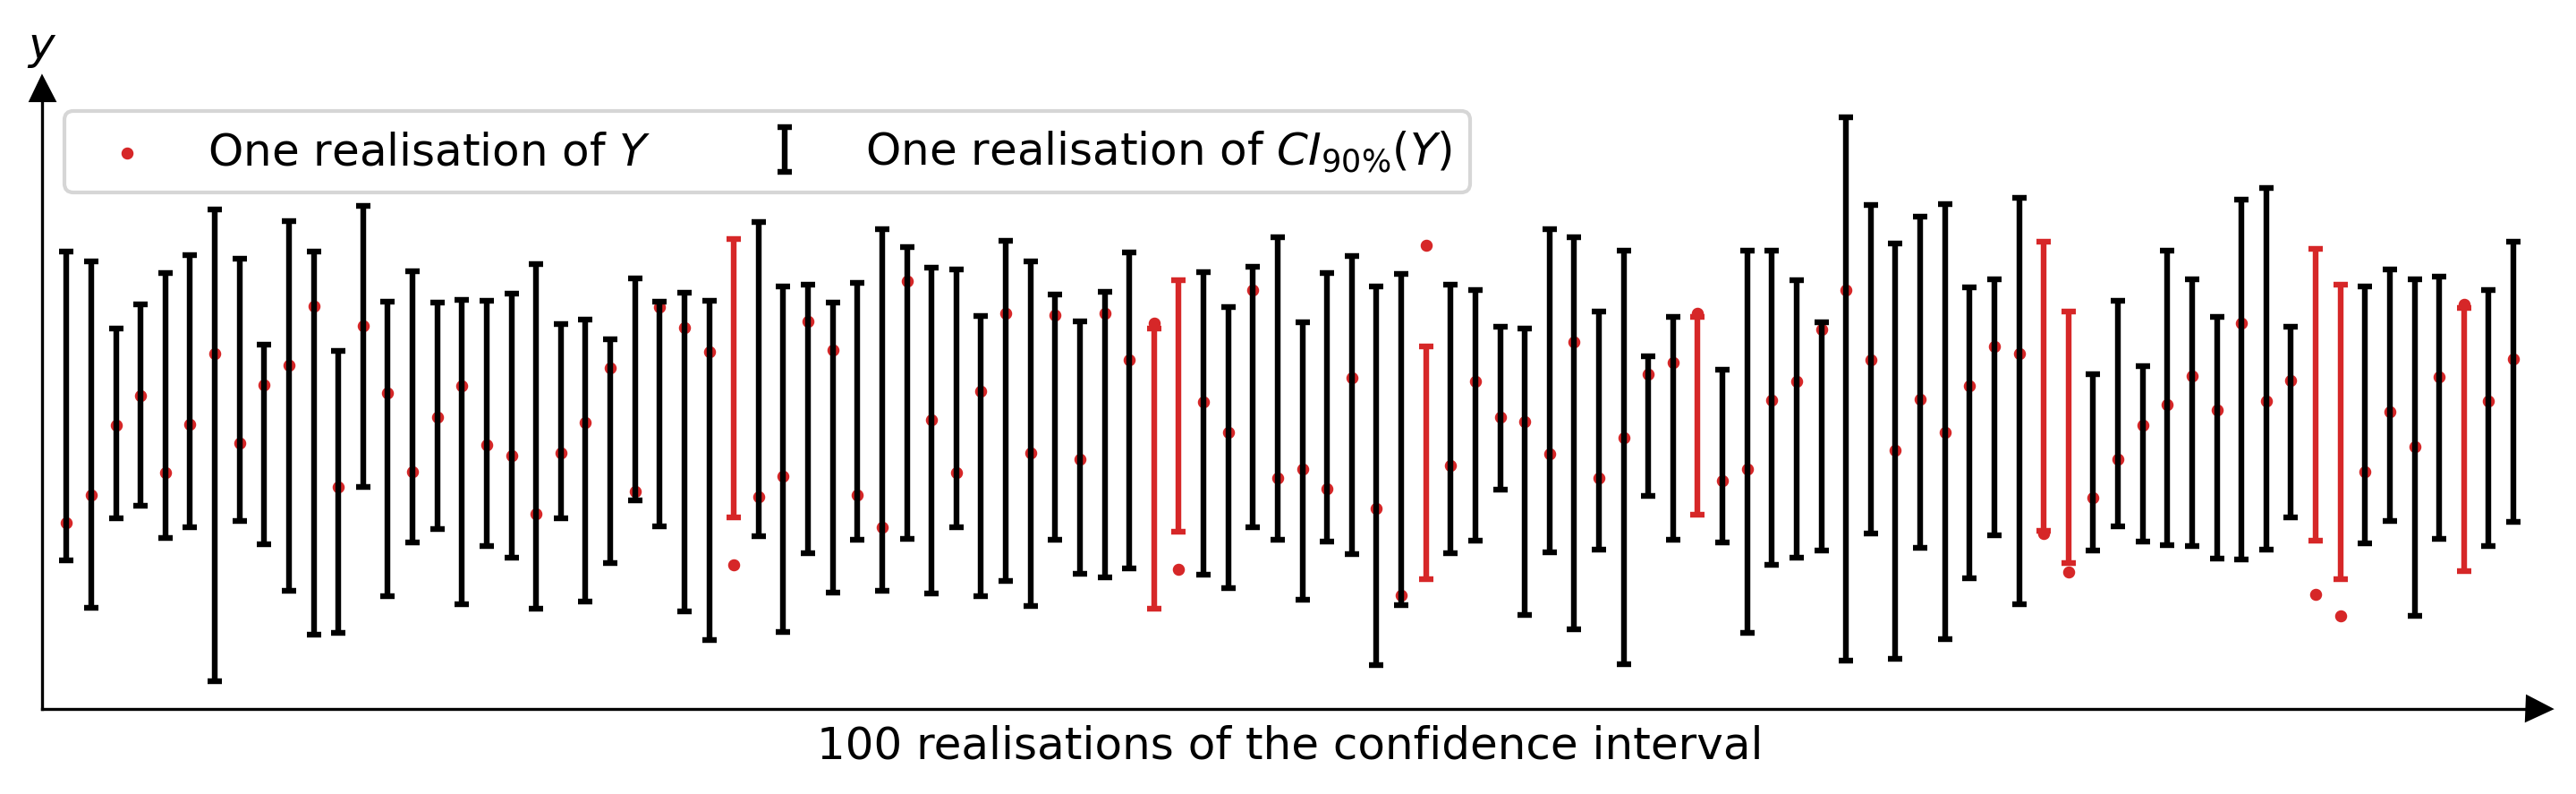

In [9]:
display_figure2(mu_X_theo, sigma_X_theo, confidence_level)

# Figure 3 of the article

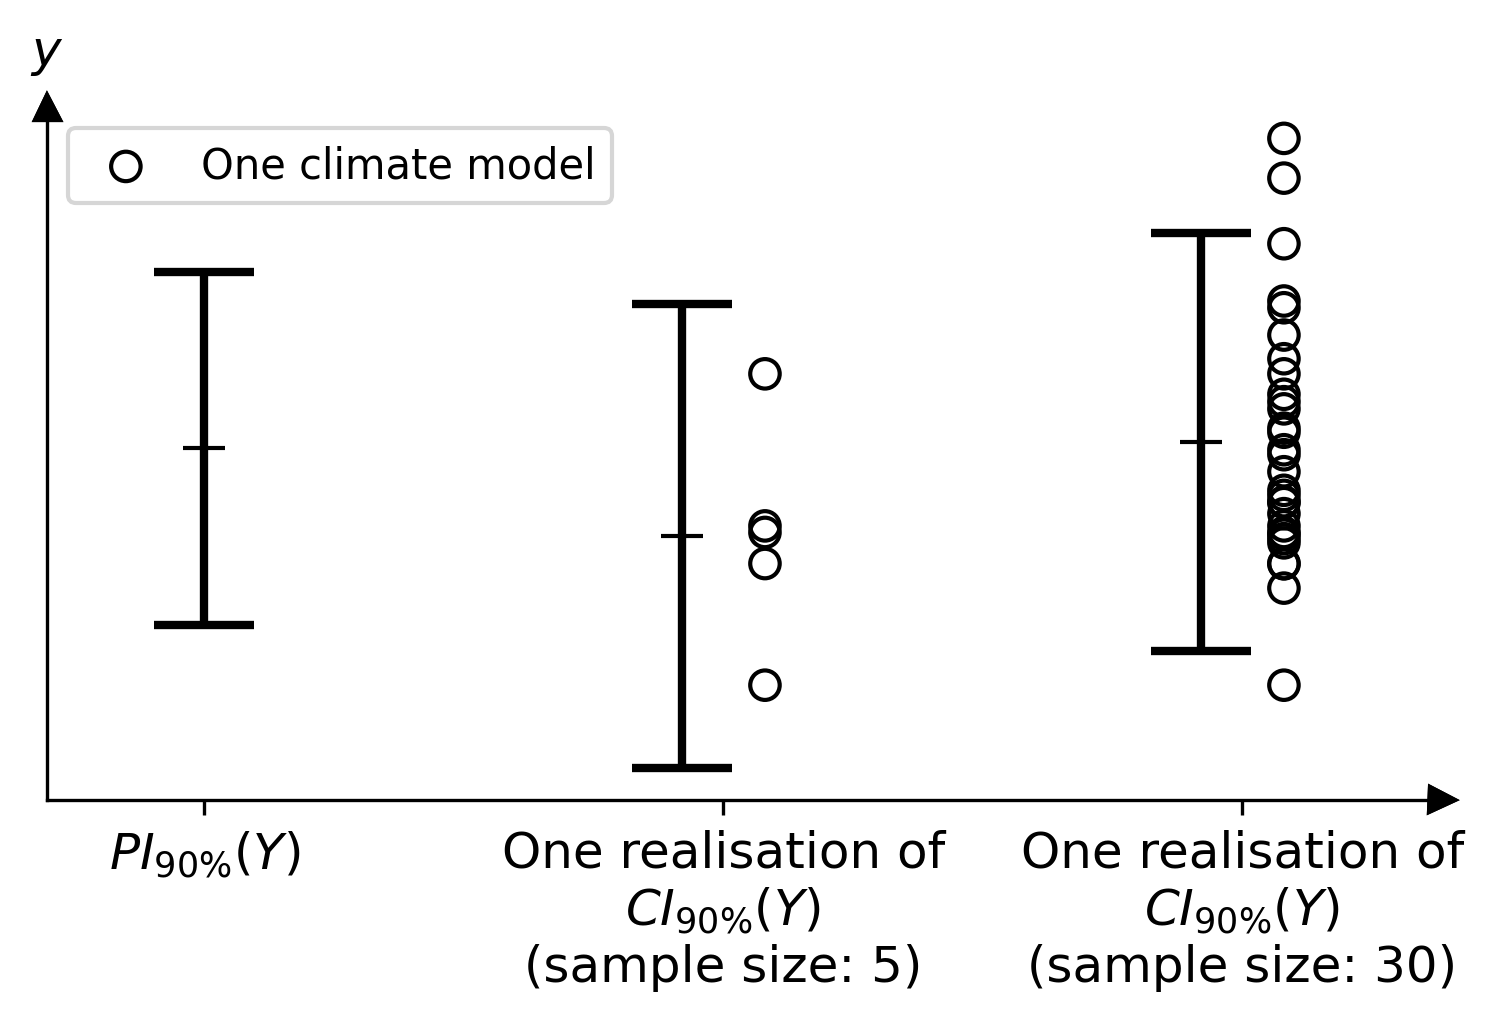

In [10]:
display_figure3(probability_interval_Y, confidence_interval_Y_per_dataset, X_simu_per_dataset, Y_simu_per_dataset)

# Figure 4 and 7 of the article

C:\Users\vportmann\Desktop\ClimLoco\notebooks\..\functions\compute_errors.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  return 100*np.abs(wrong-right)/right


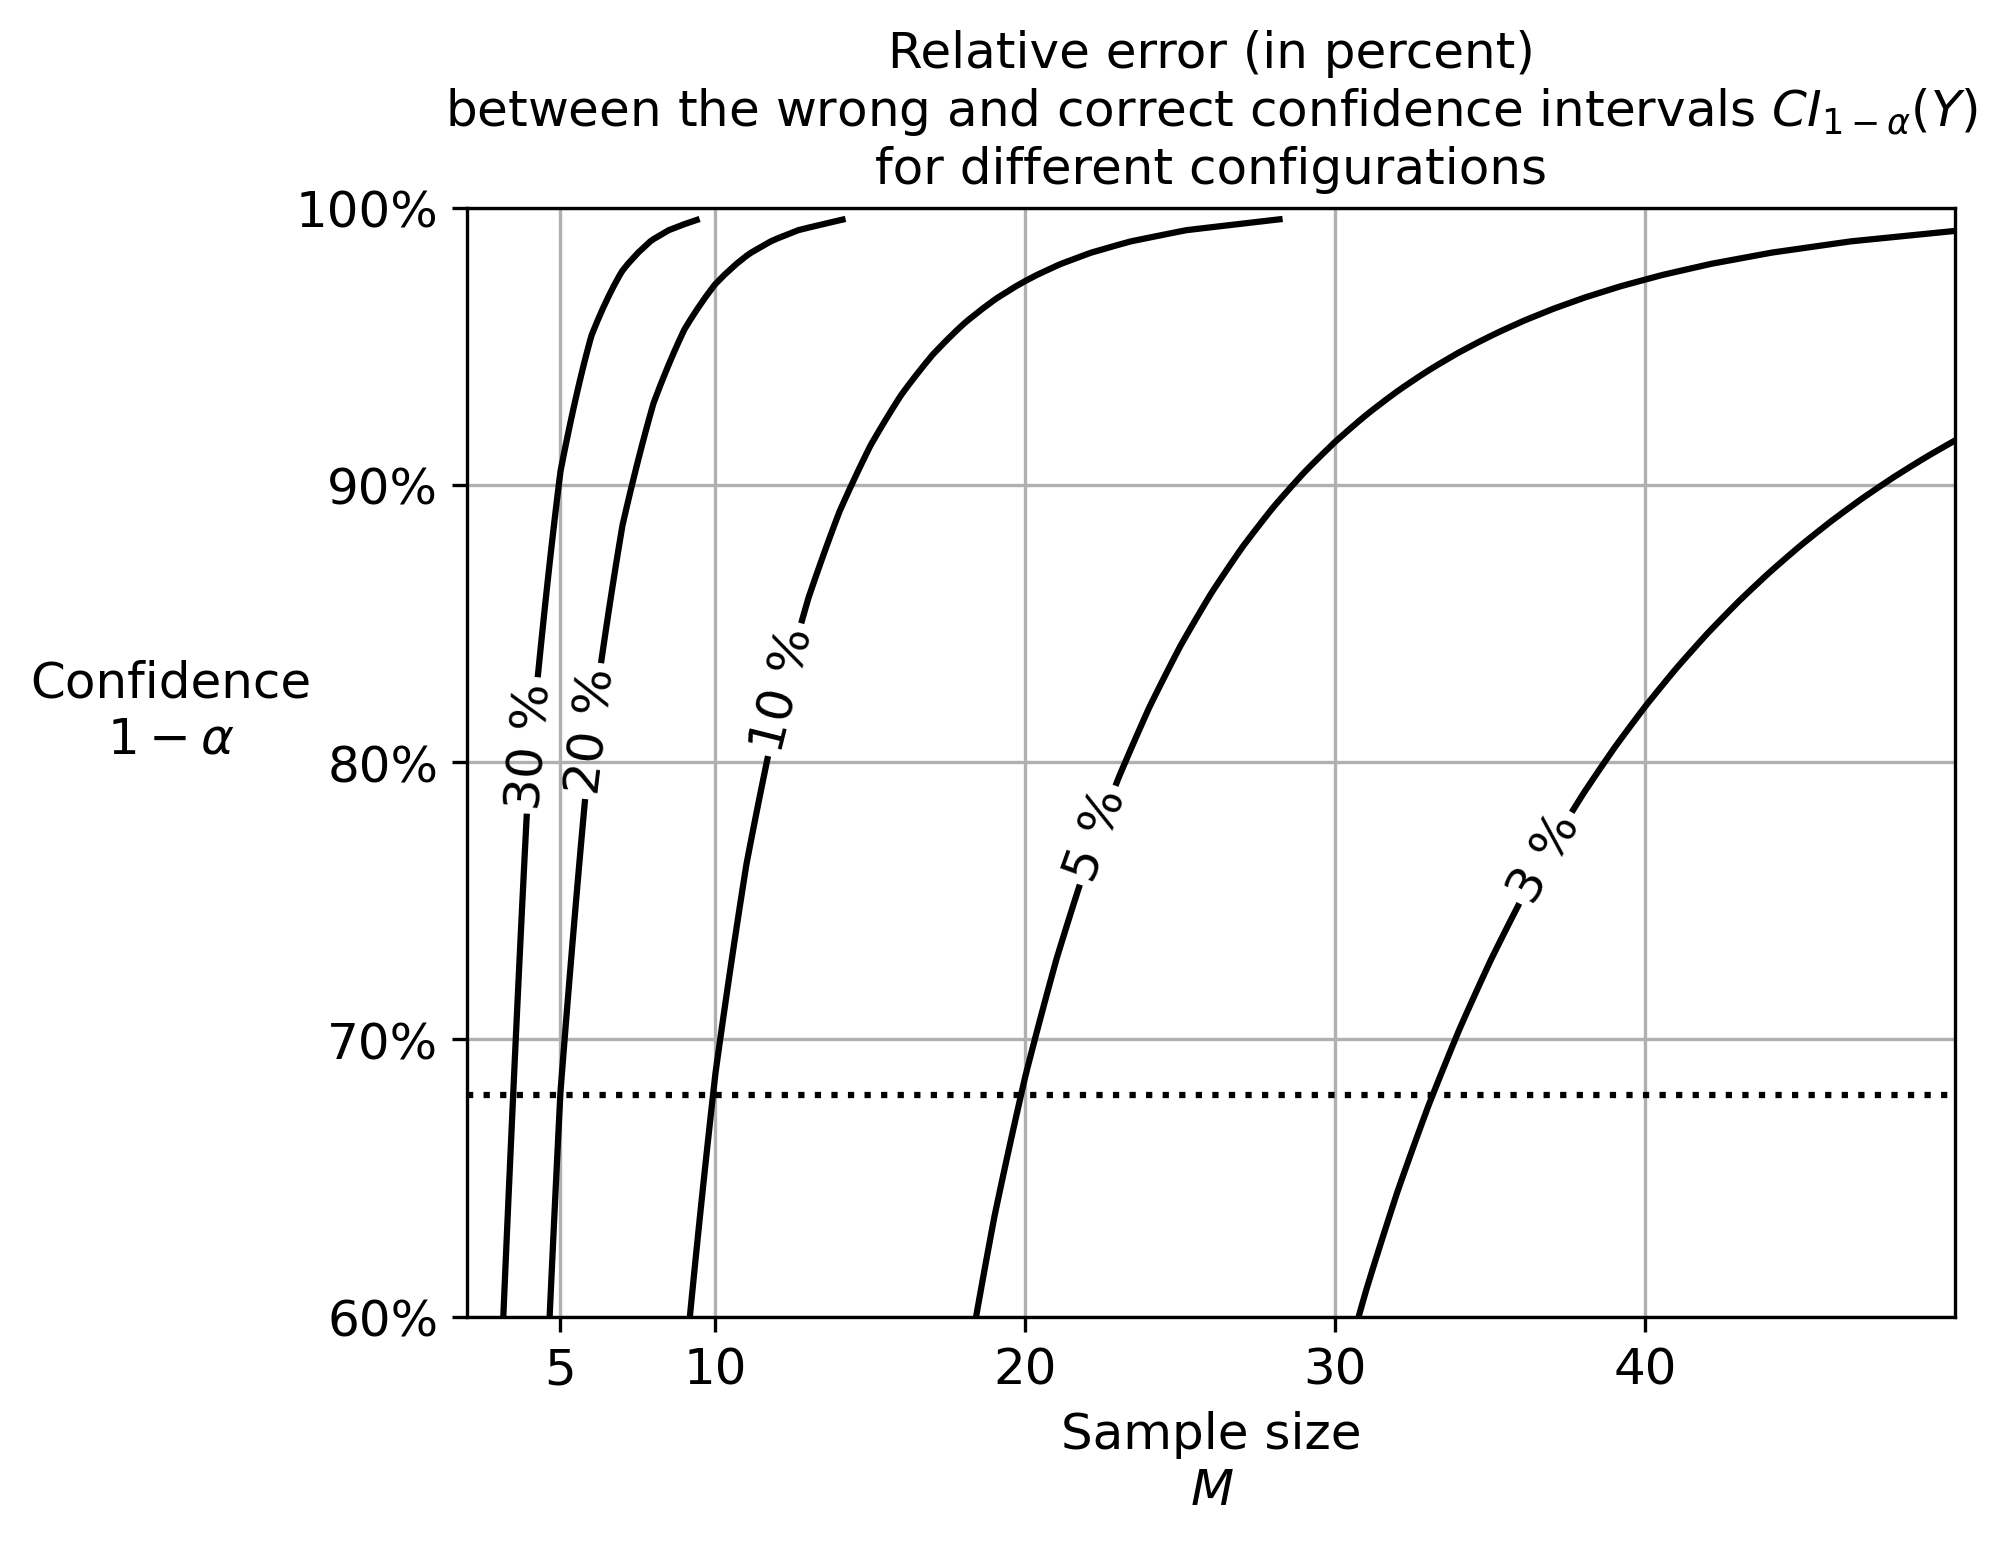

In [11]:
display_figure4()

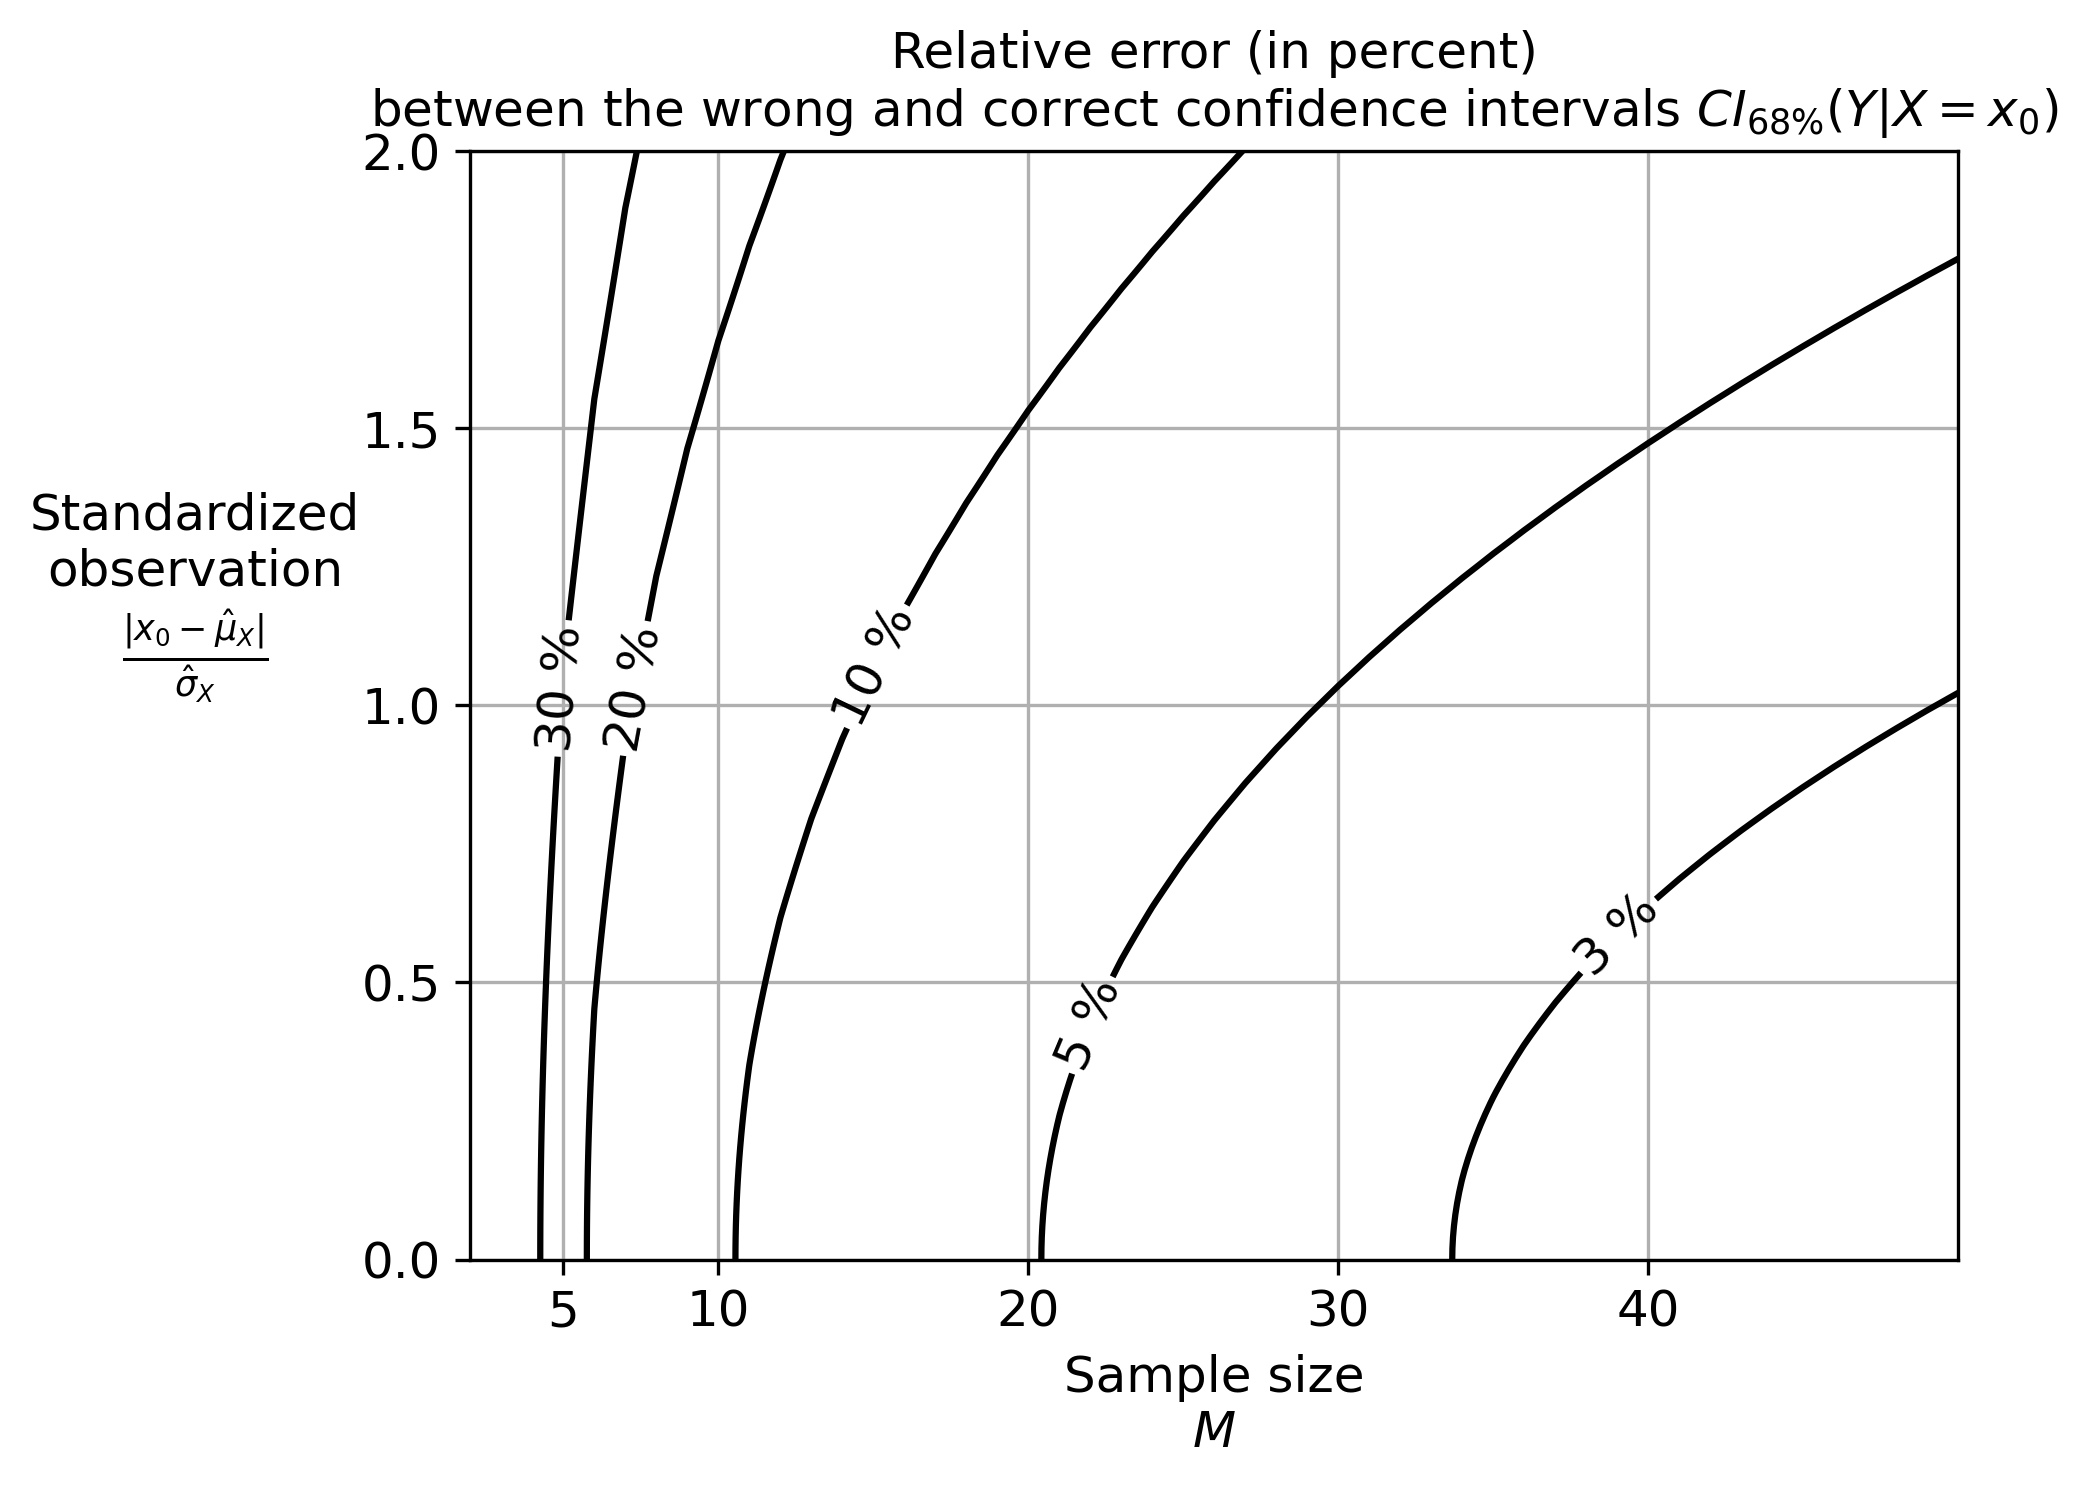

In [12]:
display_figure7()

# Figure 5 of the article

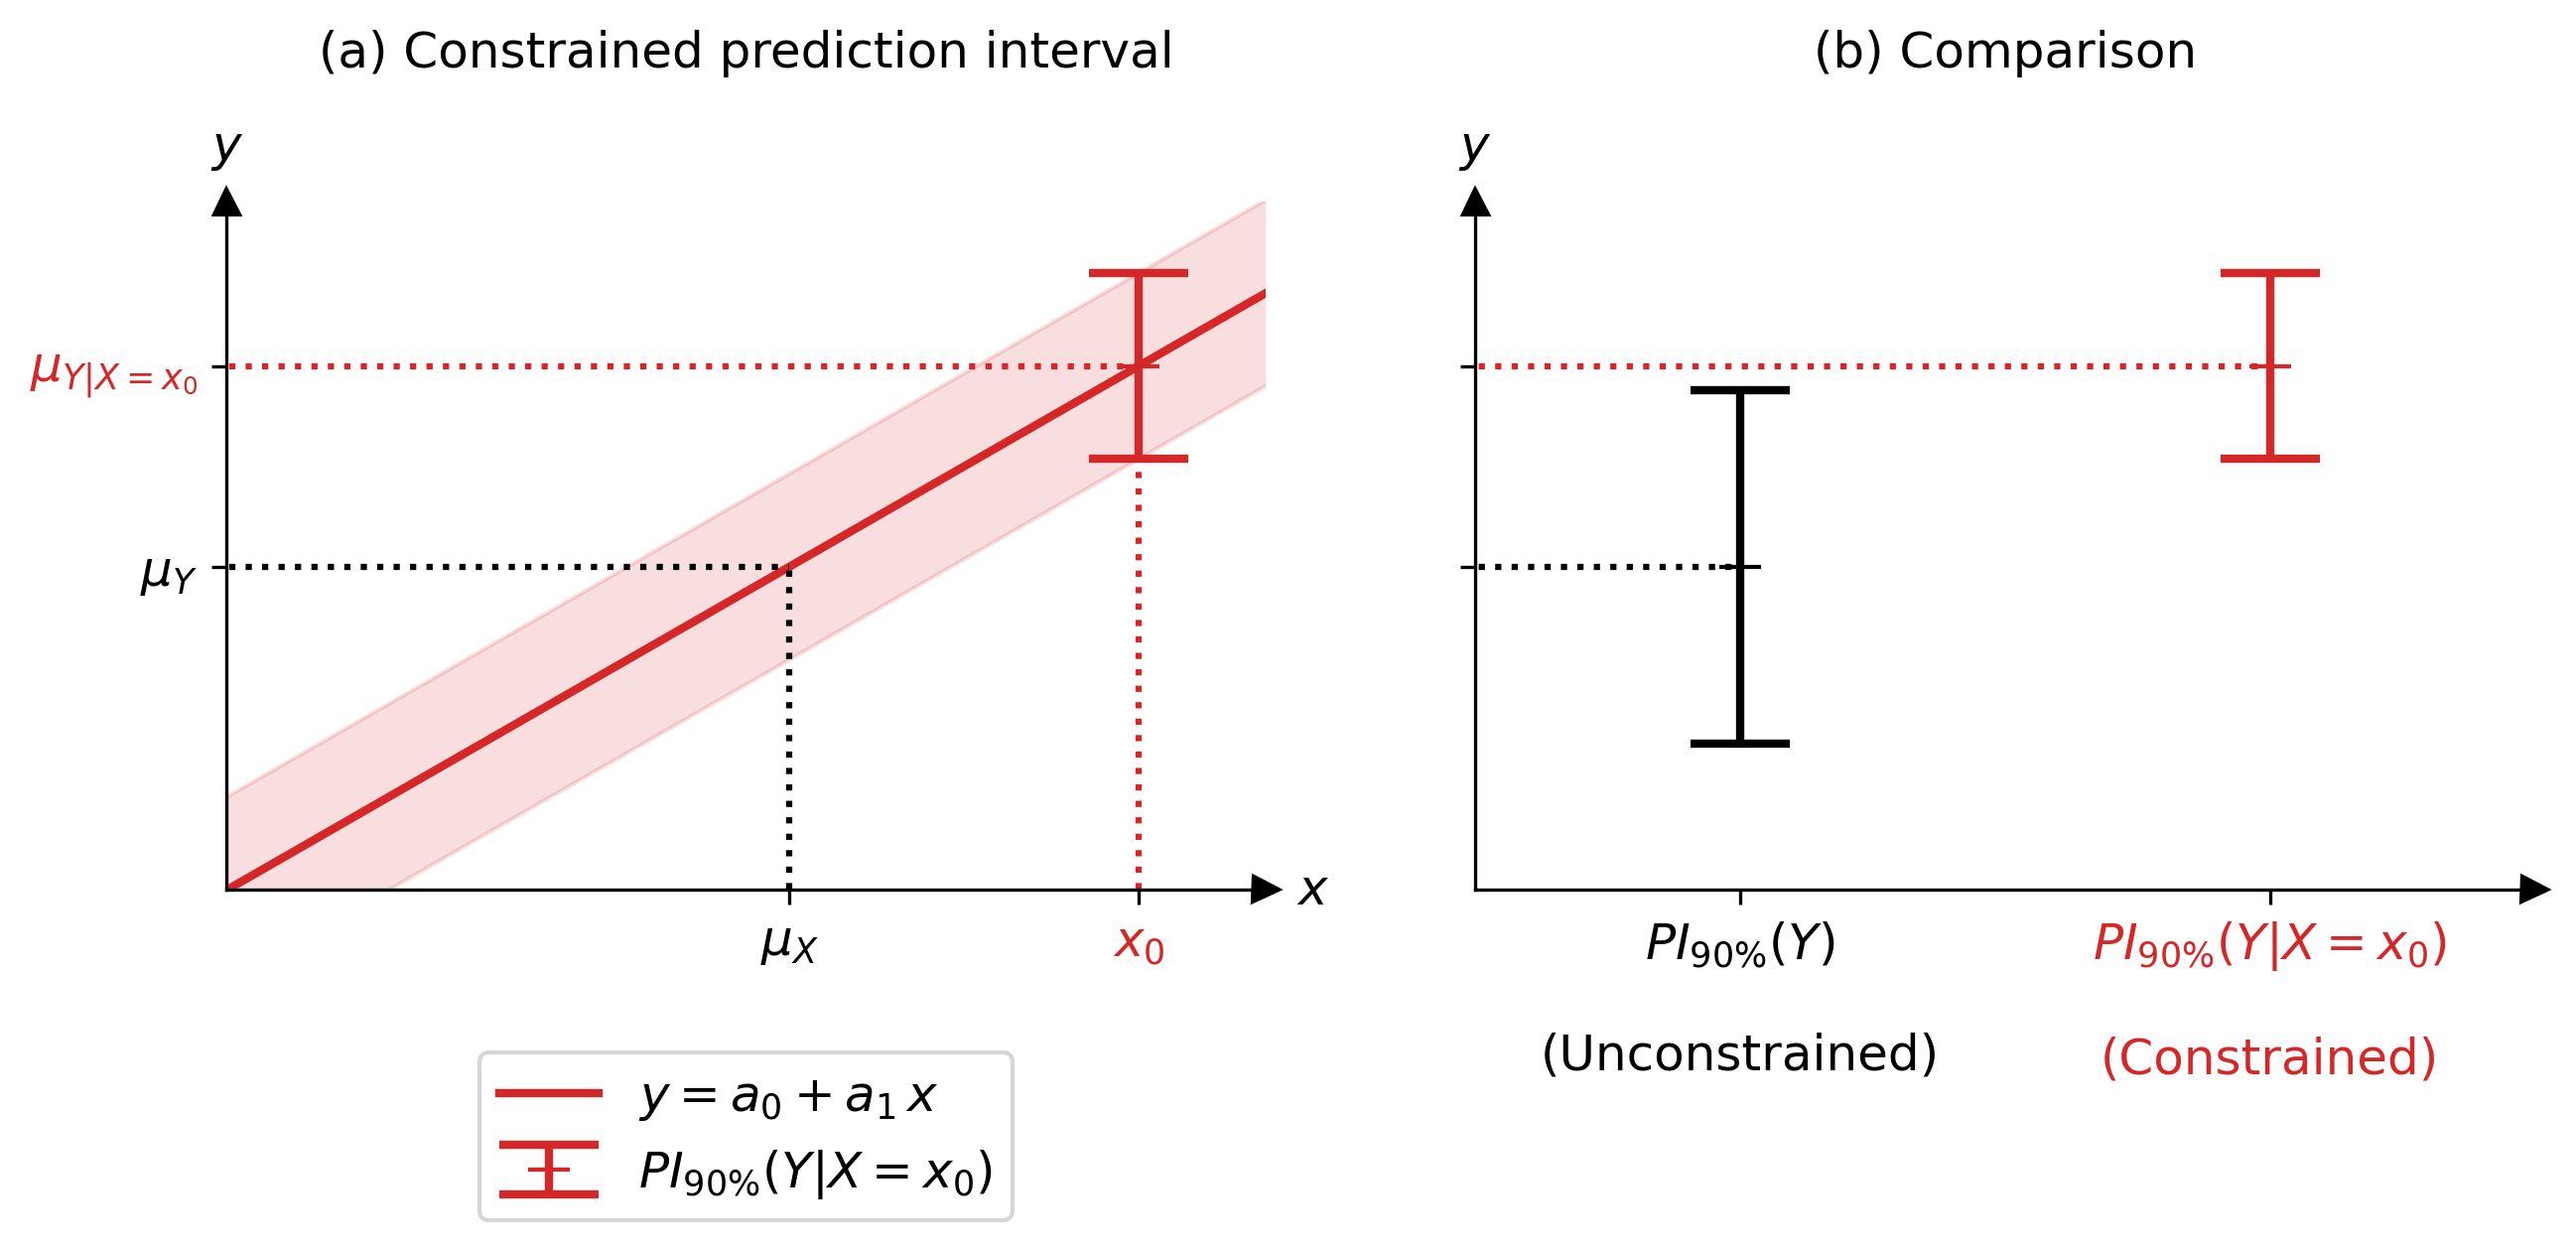

In [13]:
display_figure5(mu_X_theo, mu_Y_theo, sigma_X_theo, sigma_Y_theo, corr_theo,
                    x, Ymin, Ymax, Xmin, Xmax, X_obs,
                    probability_interval_Y, probability_interval_Y_X_noiseless)

# Figure 6 of the article

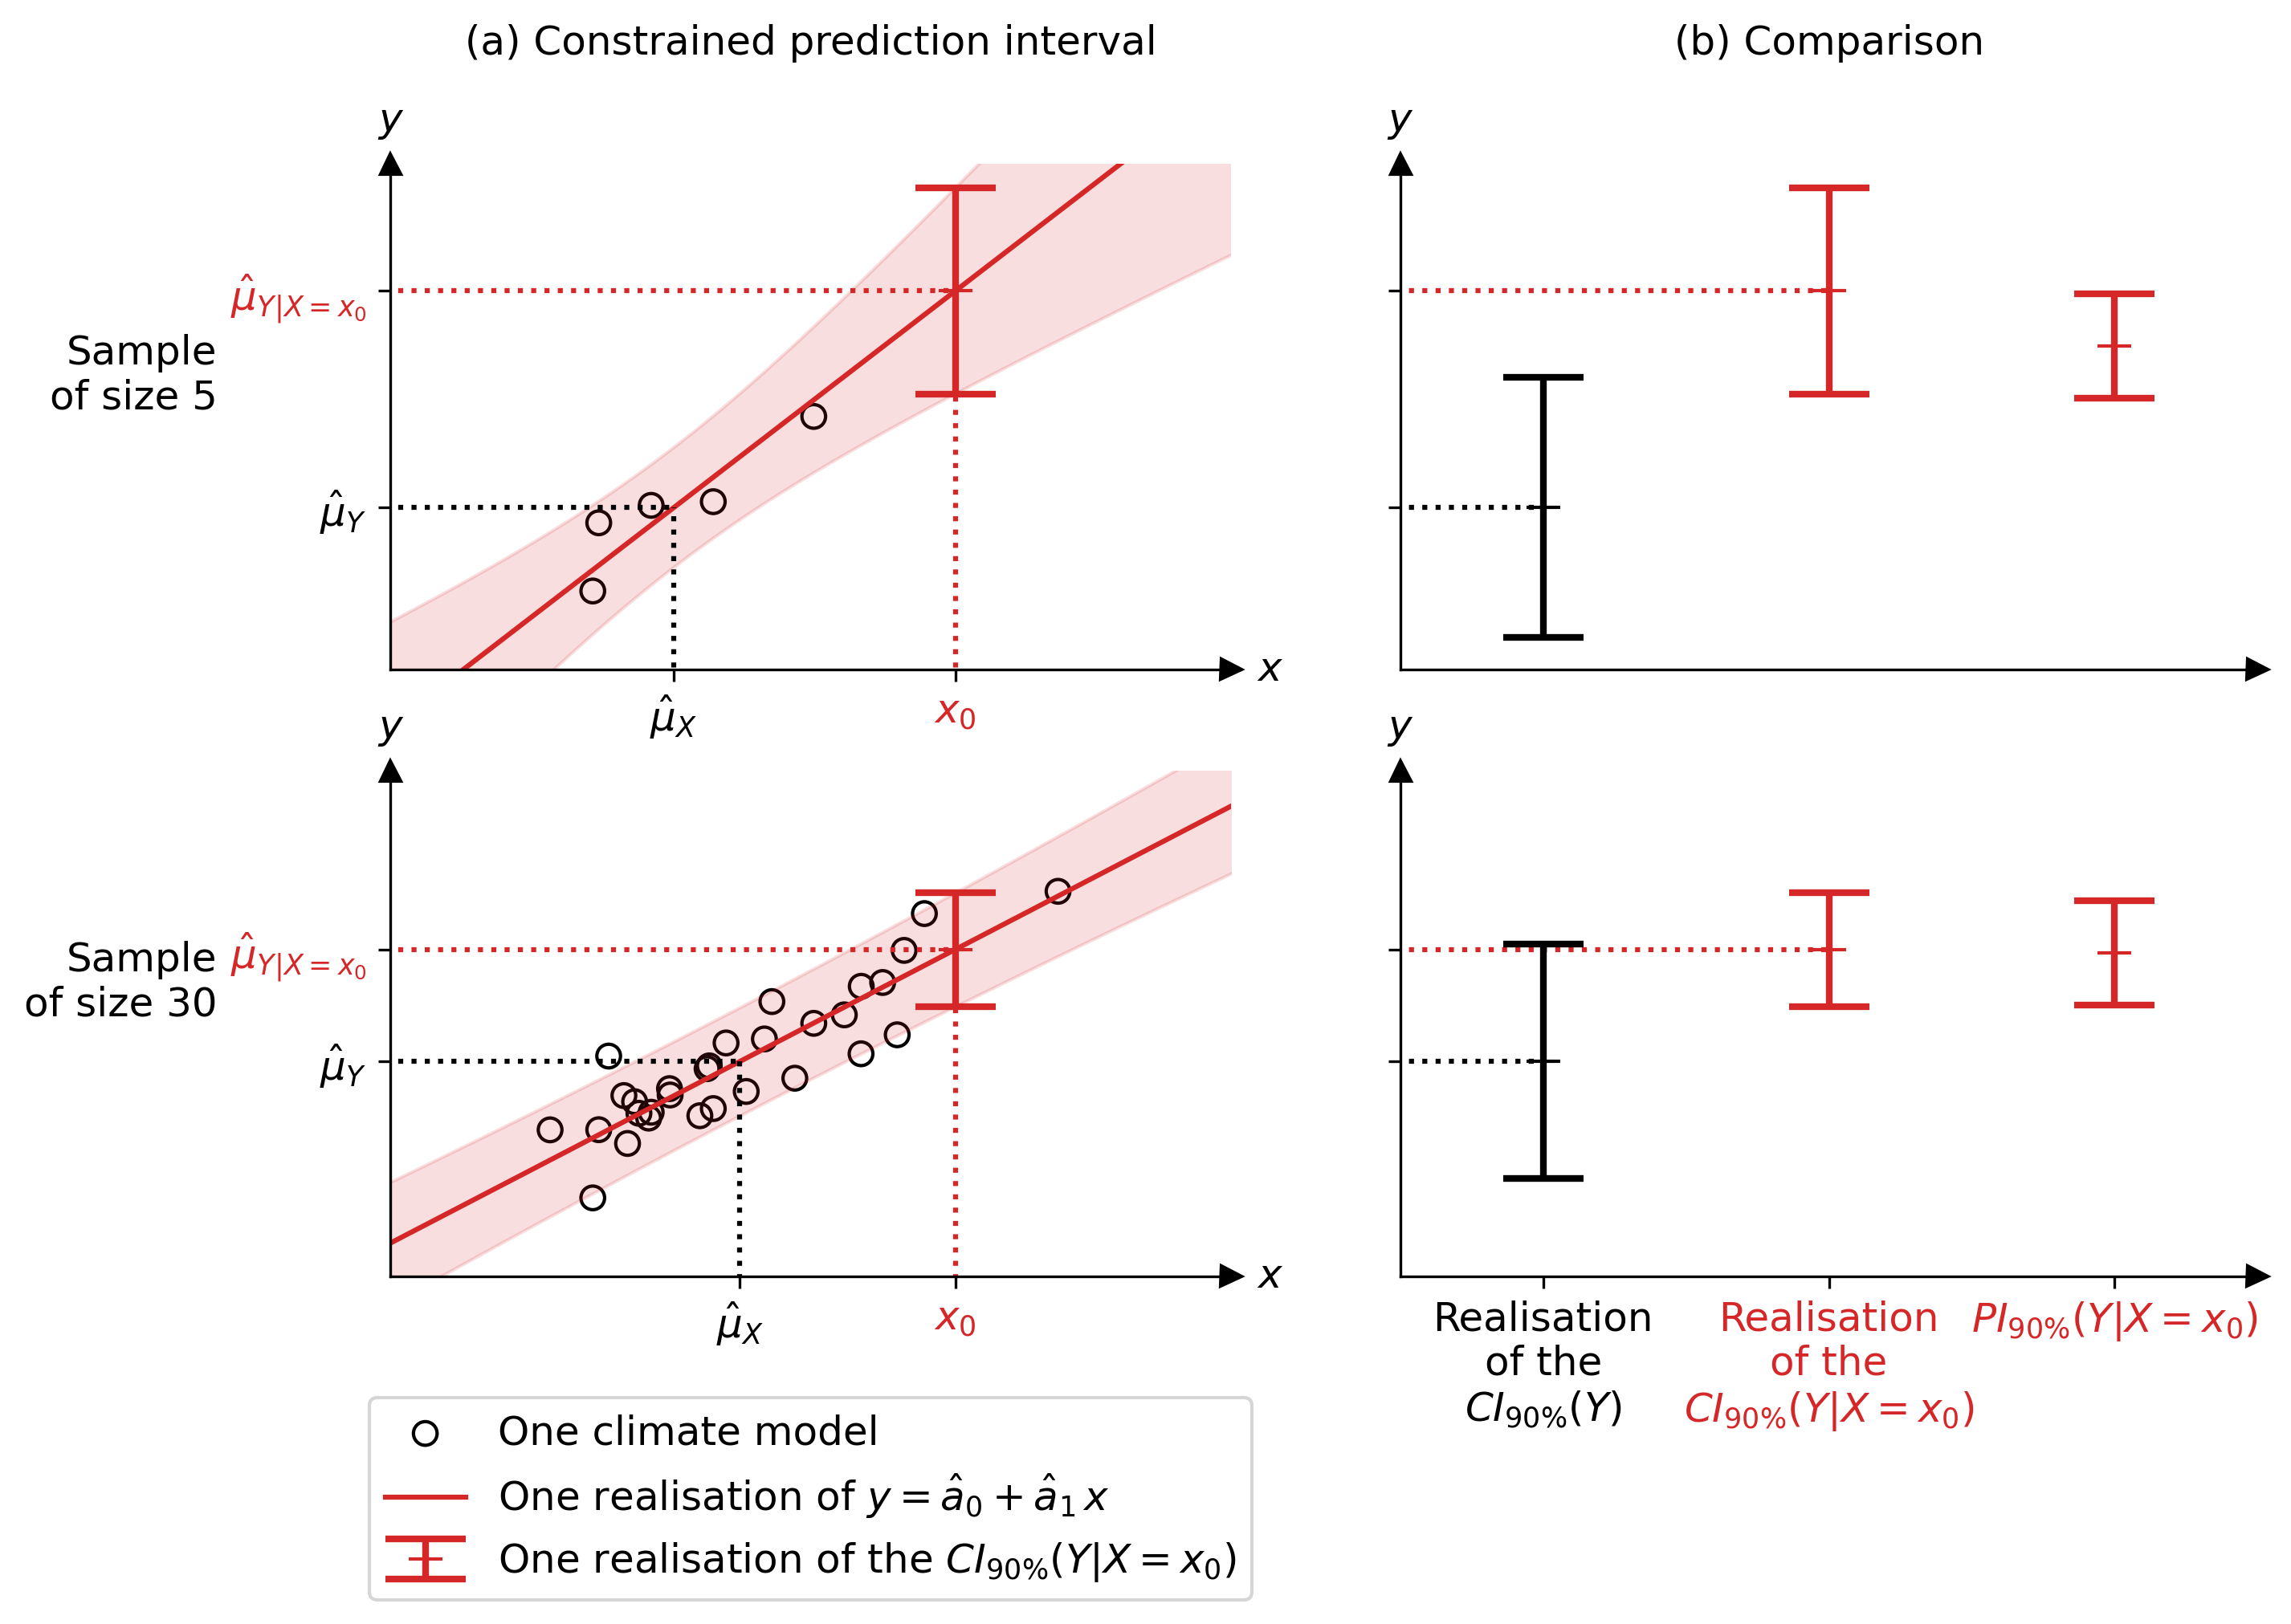

In [14]:
display_figure6(mu_X_theo, mu_Y_theo, sigma_X_theo, sigma_Y_theo, corr_theo,
                X_simu_per_dataset, Y_simu_per_dataset,
                x, Ymin, Ymax, Xmin, Xmax, X_obs,
                confidence_interval_Y_per_dataset, confidence_interval_Y_X_noiseless_per_dataset,
                confidence_interval_Y_X_noiseless_per_dataset_per_X_obs, probability_interval_Y_X_noiseless)

# Figure 8 of the article

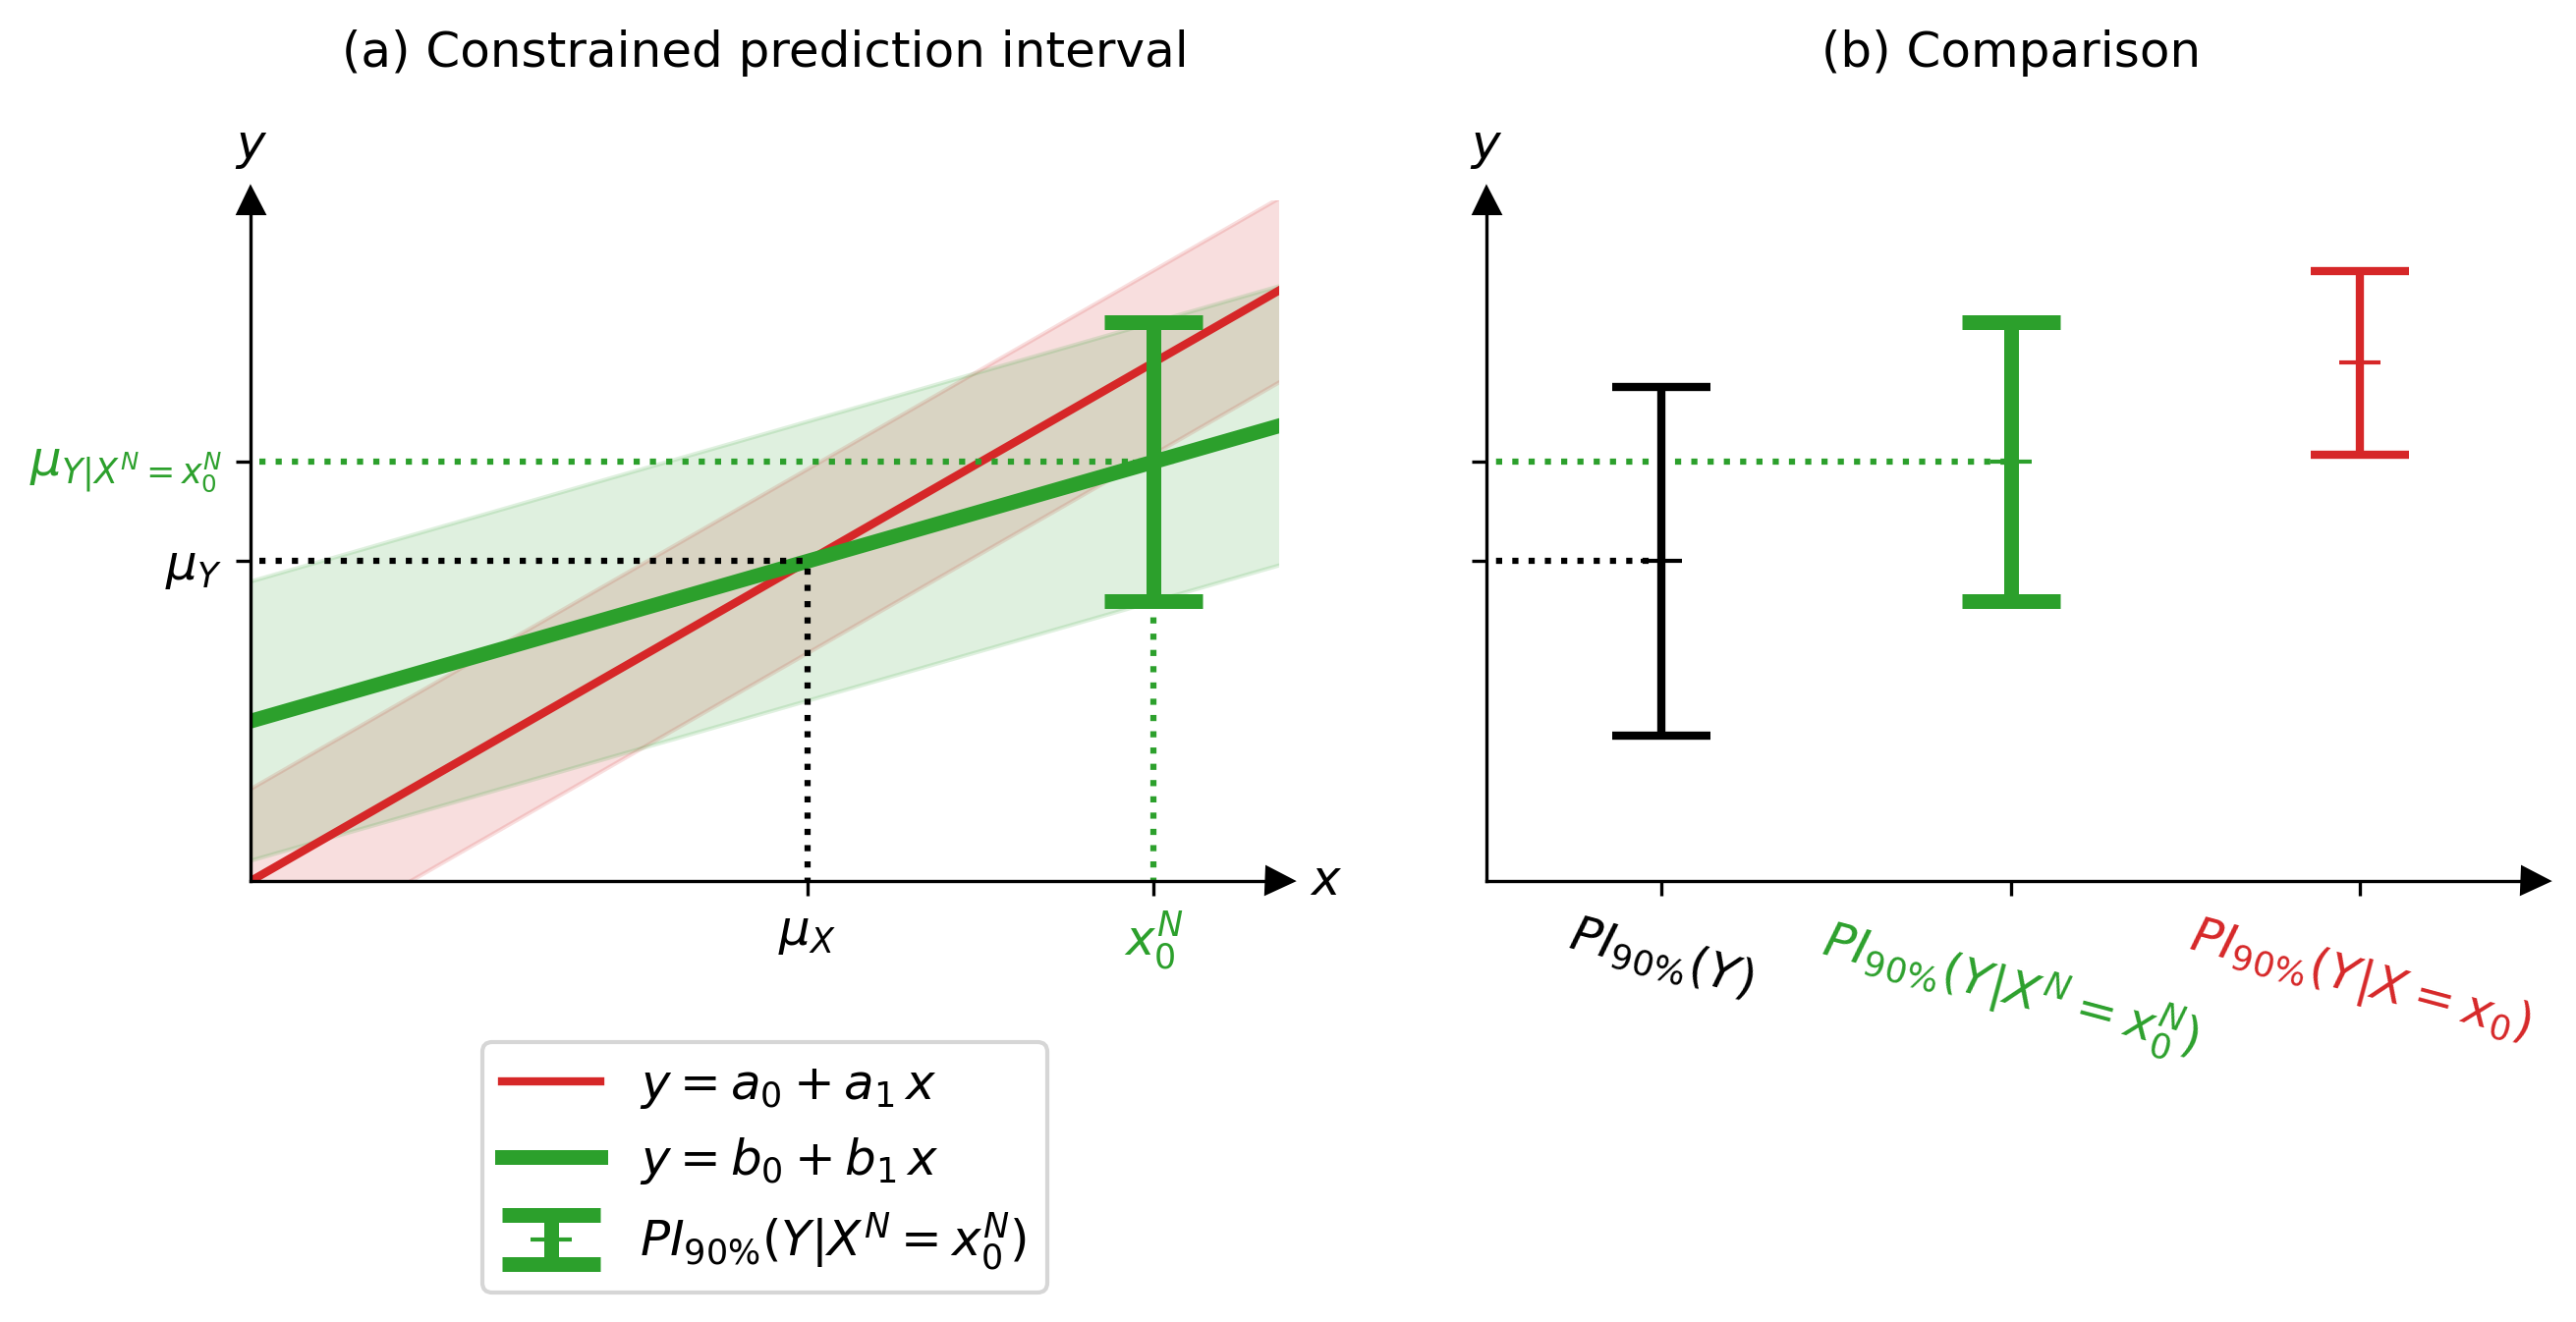

In [15]:
display_figure8(mu_X_theo, mu_Y_theo, sigma_X_theo, sigma_Y_theo, corr_theo, sigma_N,
                    x, Ymin, Ymax, Xmin, Xmax, X_obs,
                    probability_interval_Y, probability_interval_Y_X_noiseless, probability_interval_Y_X_noisy)

# Figure 9 of the article

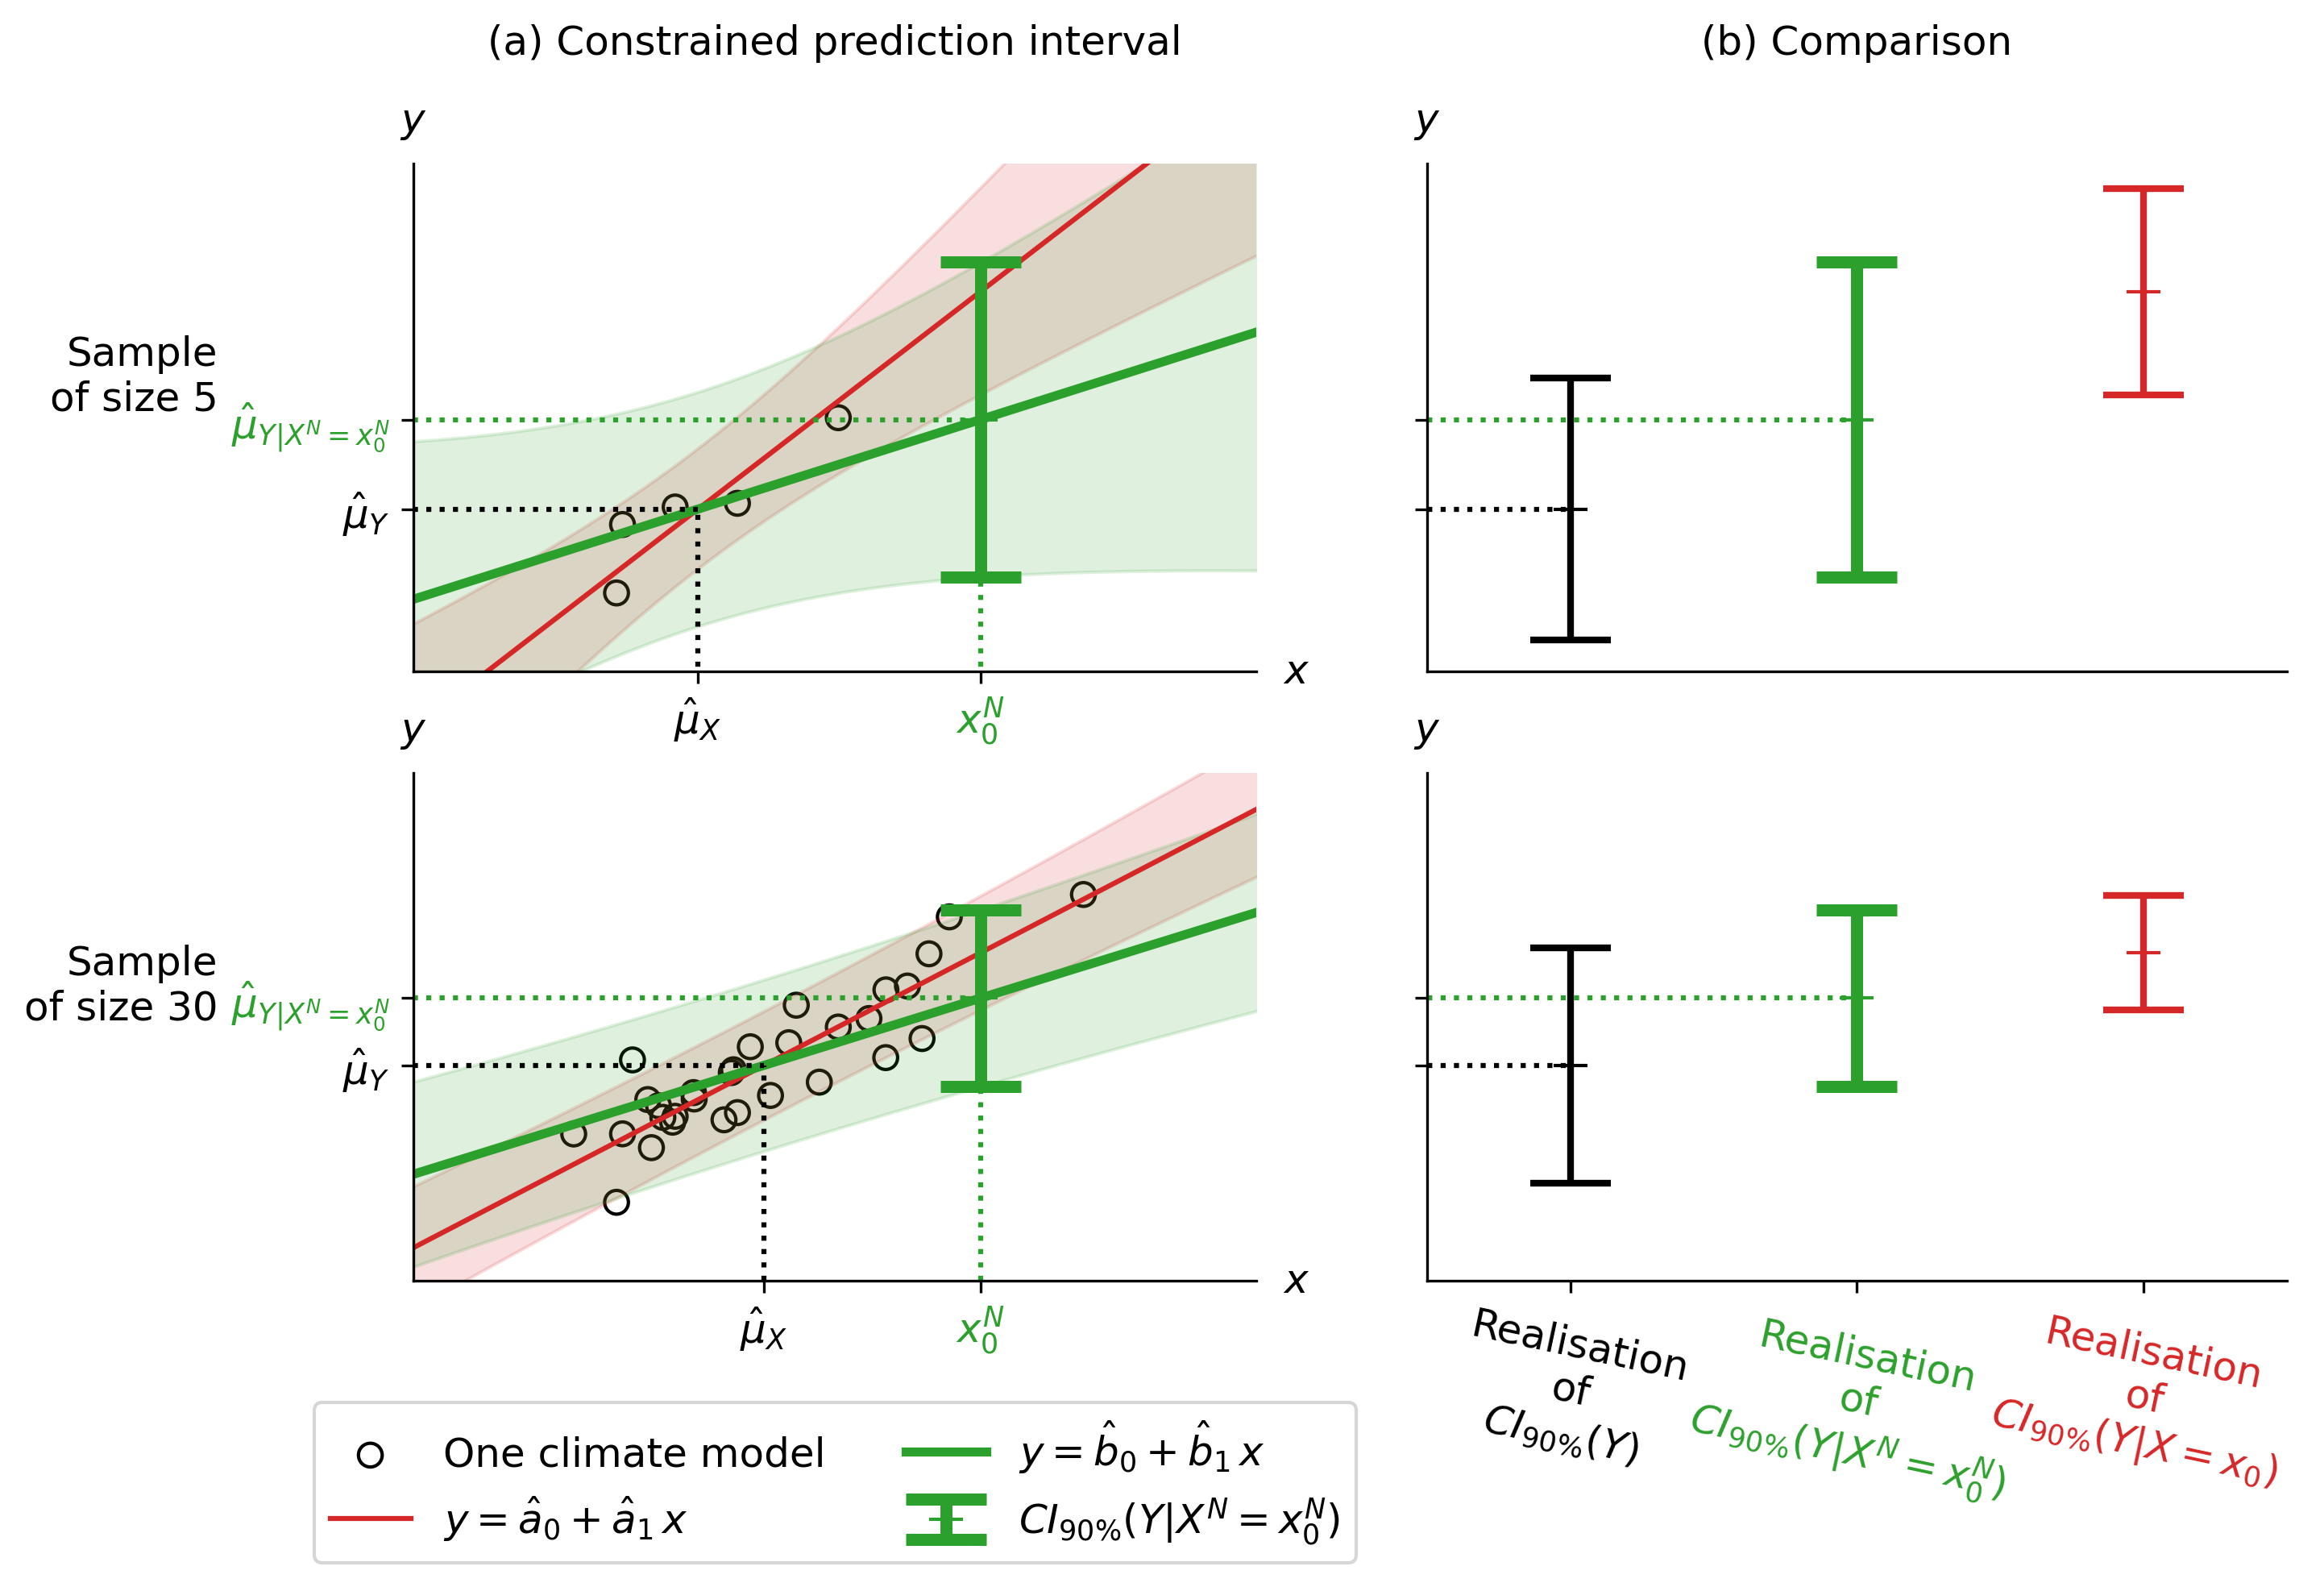

In [16]:
display_figure9(mu_X_theo, mu_Y_theo, sigma_X_theo, sigma_Y_theo, corr_theo, sigma_N,
                x, Ymin, Ymax, Xmin, Xmax, X_obs,
                X_simu_per_dataset, Y_simu_per_dataset,
                confidence_interval_Y_per_dataset, confidence_interval_Y_X_noiseless_per_dataset, confidence_interval_Y_X_noisy_per_dataset,
                confidence_interval_Y_X_noiseless_per_dataset_per_X_obs, confidence_interval_Y_X_noisy_per_dataset_per_X_obs)

# Figure 10 of the article

### New parameters : change sensibly the correlation and X_obs to obtain a better display

In [17]:
corr_theo    = 0.9
X_obs = np.array(3)

### Creation of the new dataset and computation of the new intervals

In [18]:
#----------- New data set
np.random.seed(300)
X_simu_per_dataset, Y_simu_per_dataset, Ymin, Ymax, Xmin, Xmax = generate_synthetic_data_sets(
    size_per_dataset,  mu_X_theo, sigma_X_theo, mu_Y_theo, sigma_Y_theo, corr_theo)


#----------- Confidence intervals
confidence_interval_Y_per_dataset             = compute_confidence_interval_Y(confidence_level, X_simu_per_dataset, Y_simu_per_dataset)
confidence_interval_Y_X_noiseless_per_dataset = compute_confidence_interval_Y_X_noiseless(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs)
confidence_interval_Y_X_noisy_per_dataset     = compute_confidence_interval_Y_X_noisy(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs, sigma_N)

#----------- Confidence intervals for different positions of X_obs (tubes for the next figure)
x = np.linspace(mu_X_theo-10*sigma_X_theo, Xmax, 200)

confidence_interval_Y_X_noiseless_per_dataset_per_X_obs = np.zeros((2,200,2))
confidence_interval_Y_X_noisy_per_dataset_per_X_obs     = np.zeros((2,200,2))
for i in range(200):
    X_obs_temp = x[i]
    confidence_interval_Y_X_noiseless_per_dataset_per_X_obs[:, i, :] = compute_confidence_interval_Y_X_noiseless(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs_temp)
    confidence_interval_Y_X_noisy_per_dataset_per_X_obs[:, i, :]     = compute_confidence_interval_Y_X_noisy(confidence_level, X_simu_per_dataset, Y_simu_per_dataset, X_obs_temp, sigma_N)


### Display the figure

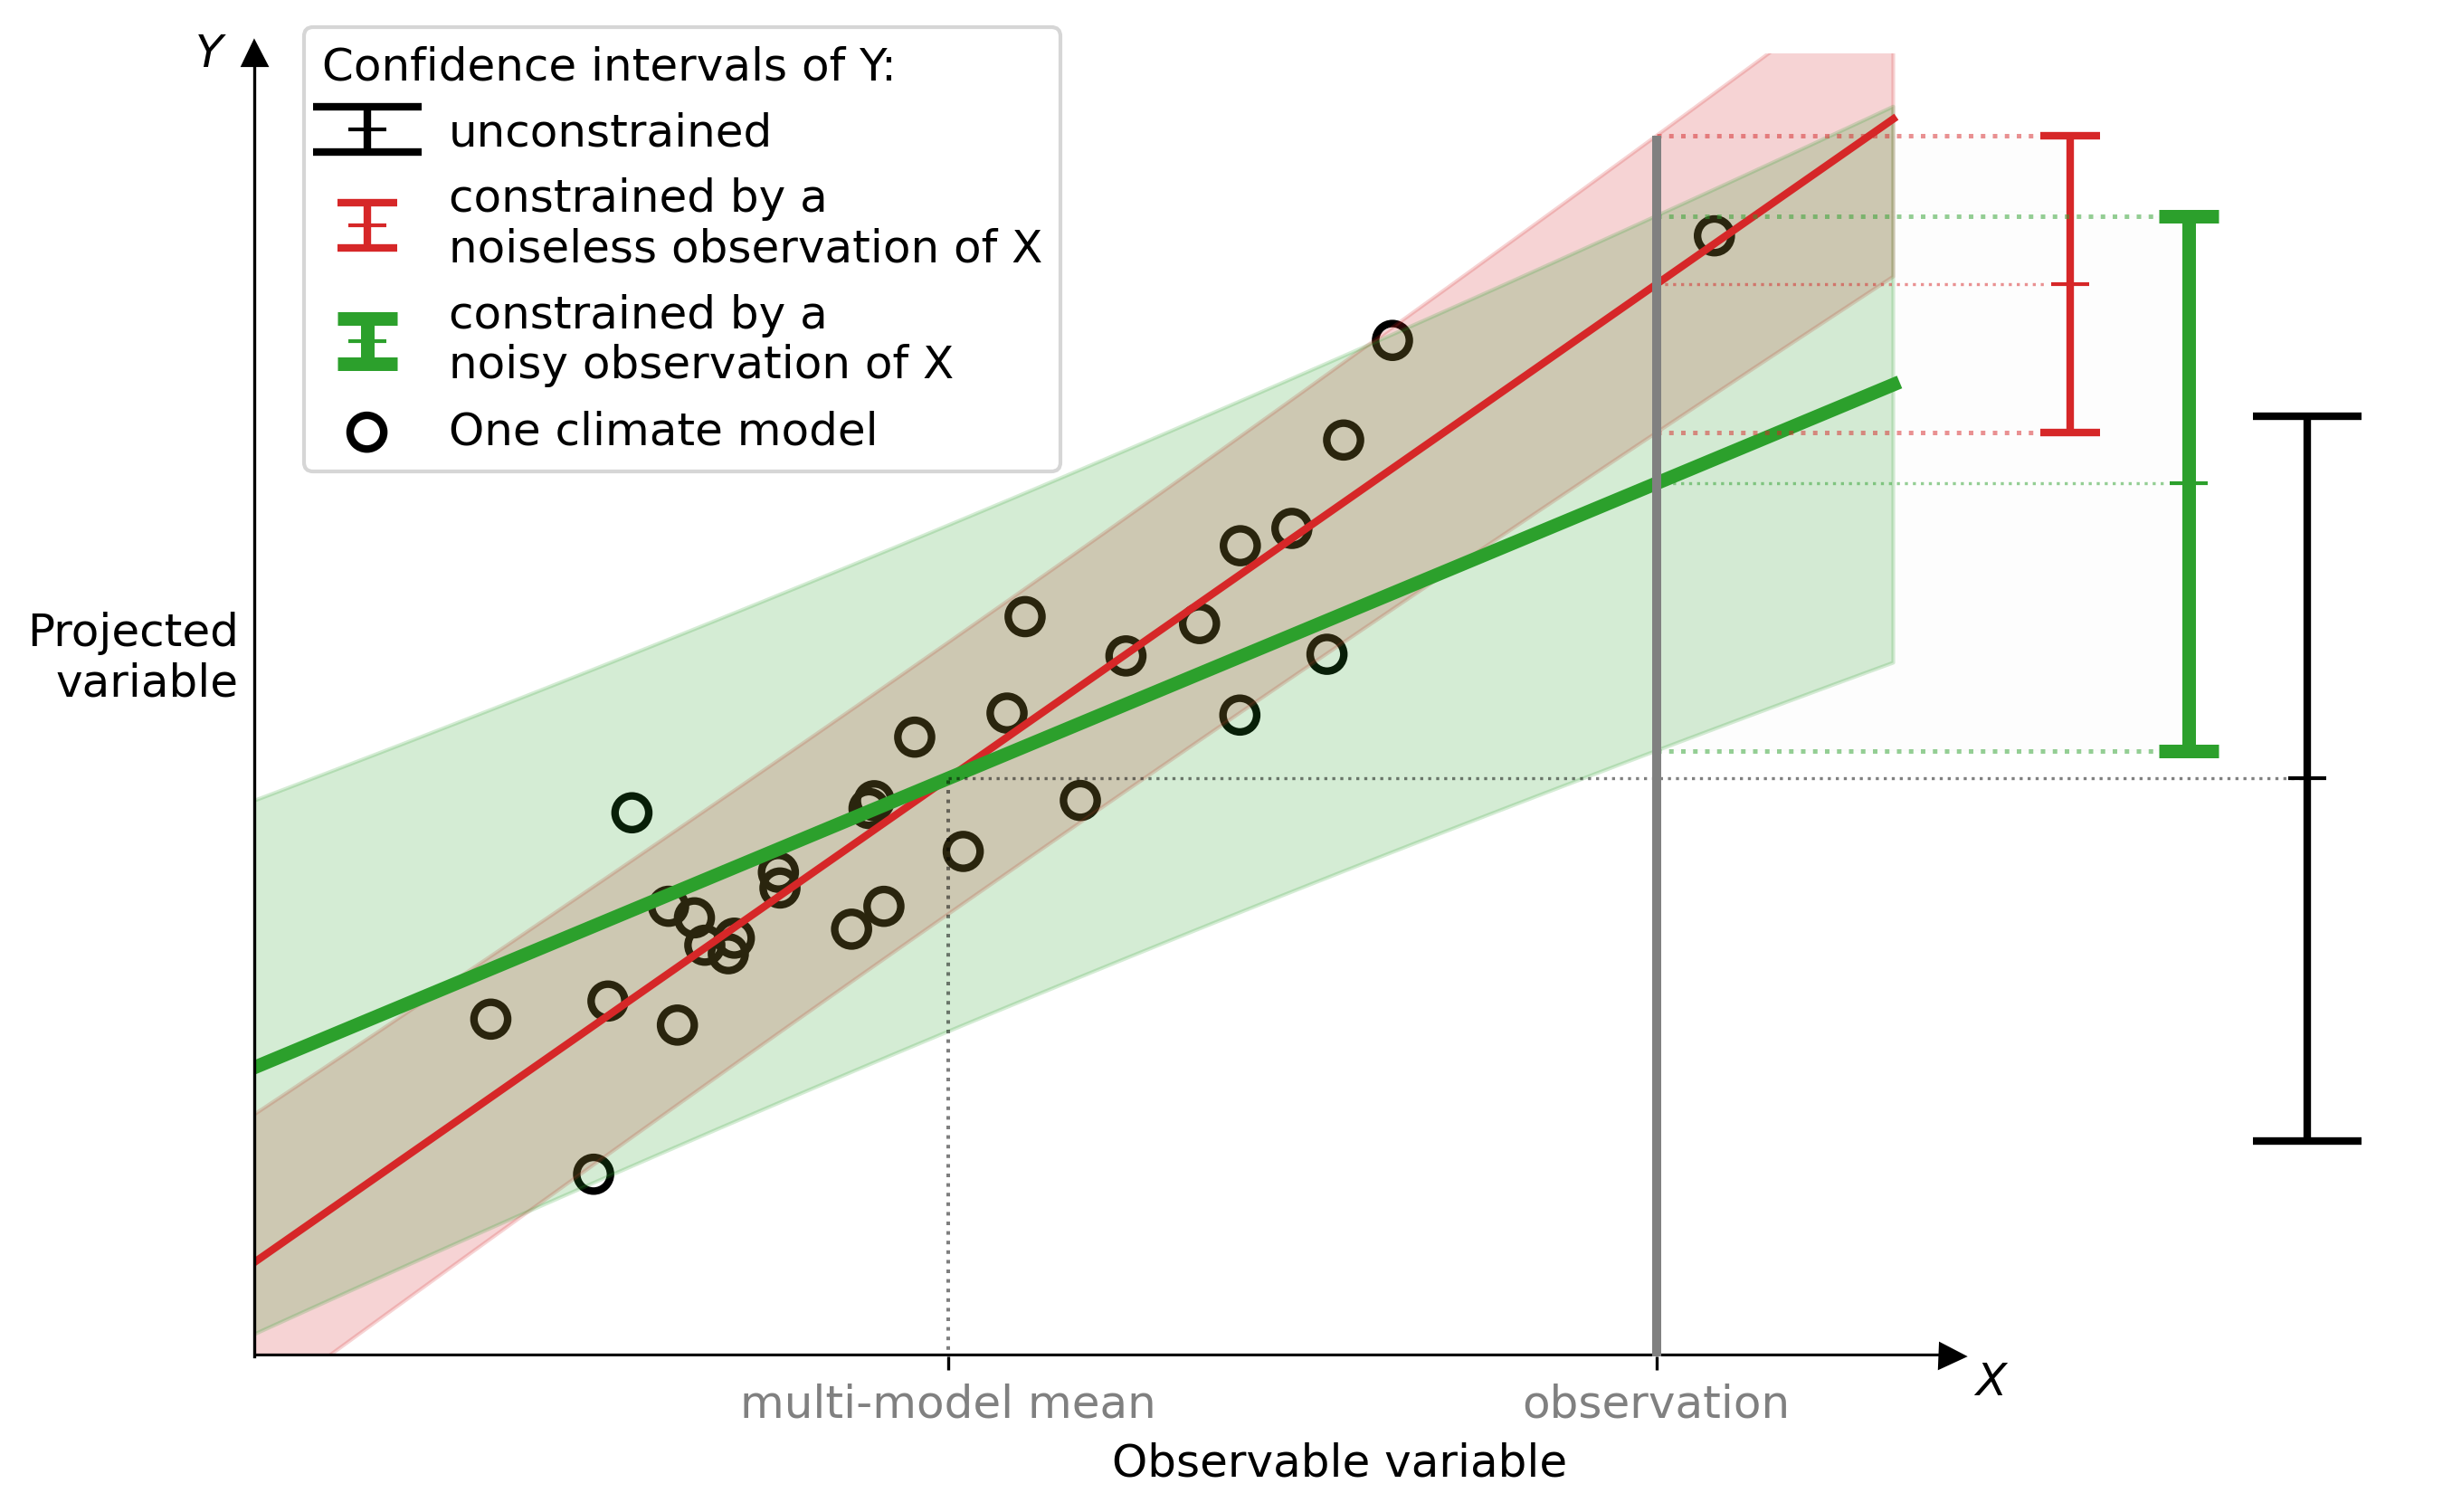

In [19]:
display_figure10(X_simu_per_dataset, Y_simu_per_dataset, x, X_obs, sigma_N,
                    confidence_interval_Y_per_dataset, confidence_interval_Y_X_noiseless_per_dataset, confidence_interval_Y_X_noisy_per_dataset,
                    confidence_interval_Y_X_noiseless_per_dataset_per_X_obs, confidence_interval_Y_X_noisy_per_dataset_per_X_obs)